In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

import jaro


Creation du data set Aliment

In [2]:
df=pd.read_excel("AGRIBALYSE3.0.1_vf.xlsm")
df

,Unnamed: 0,Unnamed: 1,"Résultat par ingrédient\n(pour les aliments ""recettes"" seulement)",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ciqual \nAGB,Ciqual \ncode,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Sous-groupe,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+...,Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de...,Eutrophisation marine (E-03 kg N eq/kg de prod...,Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau ...,Épuisement des ressources eau (m3 depriv./kg d...,Épuisement des ressources énergétiques (MJ/kg ...,Épuisement des ressources minéraux (E-06 kg Sb...
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,sauces,0.039743,0.164754,...,0.046616,0.006761,0.029441,0.052027,1.32923,16.984964,7.404112,0.337769,1.475548,0.251356
4,NaN,NaN,NaN,NaN,NaN,NaN,Ail,sauces,0.004417,0.011444,...,0.000781,0.000105,0.000328,0.00476,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,NaN,NaN,NaN,NaN,NaN,NaN,Total,produits laitiers frais et assimilés,0.351296,2.441307,...,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883
6708,19860,19860,"Yaourt à la grecque, nature",lait et produits laitiers,produits laitiers frais et assimilés,"Yogurt, Greek-style, plain",Lait,produits laitiers frais et assimilés,0.063101,0.69395,...,0.043025,0.006846,0.029968,0.047026,8.579385,62.085522,1.178242,0.013914,1.062461,0.019234
6709,NaN,NaN,NaN,NaN,NaN,NaN,Lait demi-écremé,produits laitiers frais et assimilés,0.106409,1.198262,...,0.089744,0.013406,0.058485,0.107689,3.90306,66.972761,17.562407,0.373698,3.073724,0.642726
6710,NaN,NaN,NaN,NaN,NaN,NaN,Autres étapes,produits laitiers frais et assimilés,0.070305,0.549462,...,0.023034,0.002426,0.007428,0.080773,1.159934,4.096425,6.238759,0.248905,21.610336,1.176044


In [3]:
df=df.drop(0,axis=0)
df=df.drop(1,axis=0)


In [4]:
df


,Unnamed: 0,Unnamed: 1,"Résultat par ingrédient\n(pour les aliments ""recettes"" seulement)",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
2,Ciqual \nAGB,Ciqual \ncode,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Sous-groupe,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+...,Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de...,Eutrophisation marine (E-03 kg N eq/kg de prod...,Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau ...,Épuisement des ressources eau (m3 depriv./kg d...,Épuisement des ressources énergétiques (MJ/kg ...,Épuisement des ressources minéraux (E-06 kg Sb...
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,sauces,0.039743,0.164754,...,0.046616,0.006761,0.029441,0.052027,1.32923,16.984964,7.404112,0.337769,1.475548,0.251356
4,NaN,NaN,NaN,NaN,NaN,NaN,Ail,sauces,0.004417,0.011444,...,0.000781,0.000105,0.000328,0.00476,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
5,NaN,NaN,NaN,NaN,NaN,NaN,Jus de citron,sauces,0.019375,0.06123,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
6,NaN,NaN,NaN,NaN,NaN,NaN,Huile d'olive,sauces,0.445364,1.161825,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.10095,9.374618,12.100965,4.424012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,NaN,NaN,NaN,NaN,NaN,NaN,Total,produits laitiers frais et assimilés,0.351296,2.441307,...,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883
6708,19860,19860,"Yaourt à la grecque, nature",lait et produits laitiers,produits laitiers frais et assimilés,"Yogurt, Greek-style, plain",Lait,produits laitiers frais et assimilés,0.063101,0.69395,...,0.043025,0.006846,0.029968,0.047026,8.579385,62.085522,1.178242,0.013914,1.062461,0.019234
6709,NaN,NaN,NaN,NaN,NaN,NaN,Lait demi-écremé,produits laitiers frais et assimilés,0.106409,1.198262,...,0.089744,0.013406,0.058485,0.107689,3.90306,66.972761,17.562407,0.373698,3.073724,0.642726
6710,NaN,NaN,NaN,NaN,NaN,NaN,Autres étapes,produits laitiers frais et assimilés,0.070305,0.549462,...,0.023034,0.002426,0.007428,0.080773,1.159934,4.096425,6.238759,0.248905,21.610336,1.176044


In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1',
       '    Résultat par ingrédient\n(pour les aliments "recettes" seulement)',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [6]:
index=df.iloc[0,:]
index=list(index)
index

['Ciqual \nAGB',
 'Ciqual \ncode',
 'Nom Français',
 "Groupe d'aliment",
 "Sous-groupe d'aliment",
 'LCI Name',
 'Ingredients',
 'Sous-groupe',
 'Score unique EF (mPt/kg de produit)',
 'Changement climatique (kg CO2 eq/kg de produit)',
 "Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)",
 'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
 "Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)",
 'Particules (E-06 disease inc./kg de produit)',
 'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
 'Eutrophisation terreste (mol N eq/kg de produit)',
 'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
 'Eutrophisation marine (E-03 kg N eq/kg de produit)',
 'Utilisation du sol (Pt/kg de produit)',
 "Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)",
 'Épuisement des ressources eau (m3 depriv./kg de produit)',
 'Épuisement des ressources énergétiques (MJ/kg de produit)',
 'Épuisement des ressources minéraux 

In [7]:
df.columns=index

In [8]:
df=df.drop(2,axis=0)
df

,Ciqual \nAGB,Ciqual \ncode,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Sous-groupe,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,sauces,0.039743,0.164754,...,0.046616,0.006761,0.029441,0.052027,1.32923,16.984964,7.404112,0.337769,1.475548,0.251356
4,NaN,NaN,NaN,NaN,NaN,NaN,Ail,sauces,0.004417,0.011444,...,0.000781,0.000105,0.000328,0.00476,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
5,NaN,NaN,NaN,NaN,NaN,NaN,Jus de citron,sauces,0.019375,0.06123,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
6,NaN,NaN,NaN,NaN,NaN,NaN,Huile d'olive,sauces,0.445364,1.161825,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.10095,9.374618,12.100965,4.424012
7,NaN,NaN,NaN,NaN,NaN,NaN,Autres étapes,sauces,0.080761,0.571172,...,0.024611,0.00263,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,NaN,NaN,NaN,NaN,NaN,NaN,Total,produits laitiers frais et assimilés,0.351296,2.441307,...,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883
6708,19860,19860,"Yaourt à la grecque, nature",lait et produits laitiers,produits laitiers frais et assimilés,"Yogurt, Greek-style, plain",Lait,produits laitiers frais et assimilés,0.063101,0.69395,...,0.043025,0.006846,0.029968,0.047026,8.579385,62.085522,1.178242,0.013914,1.062461,0.019234
6709,NaN,NaN,NaN,NaN,NaN,NaN,Lait demi-écremé,produits laitiers frais et assimilés,0.106409,1.198262,...,0.089744,0.013406,0.058485,0.107689,3.90306,66.972761,17.562407,0.373698,3.073724,0.642726
6710,NaN,NaN,NaN,NaN,NaN,NaN,Autres étapes,produits laitiers frais et assimilés,0.070305,0.549462,...,0.023034,0.002426,0.007428,0.080773,1.159934,4.096425,6.238759,0.248905,21.610336,1.176044


In [9]:
df.columns


Index(['Ciqual \nAGB', 'Ciqual \ncode', 'Nom Français', 'Groupe d'aliment',
       'Sous-groupe d'aliment', 'LCI Name', 'Ingredients', 'Sous-groupe',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de produit)',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)',
       'Épuisement des ressources eau (m3 depriv./kg de produit)',
       'Épuisem

In [10]:
Col_Aliment=['Ingredients', 'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d\'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d\'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de produit)',
       'Écotoxicité pour écosystèmes aquatiques d\'eau douce (CTUe/kg de produit)',
       'Épuisement des ressources eau (m3 depriv./kg de produit)',
       'Épuisement des ressources énergétiques (MJ/kg de produit)',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)']


In [11]:
Aliment=df[Col_Aliment]
Aliment.head(50)

,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
3,Jaune d'œuf,0.039743,0.164754,0.014089,0.027466,0.631131,0.046616,0.006761,0.029441,0.052027,1.32923,16.984964,7.404112,0.337769,1.475548,0.251356
4,Ail,0.004417,0.011444,0.002512,0.004964,0.057538,0.000781,0.000105,0.000328,0.00476,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
5,Jus de citron,0.019375,0.06123,0.007842,0.009068,0.334306,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
6,Huile d'olive,0.445364,1.161825,0.136467,0.081623,10.41498,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.10095,9.374618,12.100965,4.424012
7,Autres étapes,0.080761,0.571172,0.126768,0.752666,1.693003,0.024611,0.00263,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
8,Total,0.58966,1.970426,0.287678,0.875786,13.130958,0.220414,0.031971,0.130168,0.71844,12.291594,34.445553,486.780153,12.209097,37.226425,6.241939
9,Amande,0.349367,0.914647,0.070591,0.071681,4.774481,0.098041,0.012824,0.04697,0.406947,4.767077,64.11042,49.548089,27.024469,11.359491,8.104749
10,Beurre,0.290877,3.948183,0.116028,0.132608,6.361481,0.216595,0.028548,0.118738,0.489547,9.768351,125.87029,24.550142,2.573085,11.589475,4.40229
11,Blanc d'oeuf,0.111239,0.461143,0.039434,0.076877,1.766517,0.130476,0.018925,0.082405,0.145621,3.720477,47.540444,20.723904,0.945405,4.130017,0.70354
12,Farine de blé,0.007925,0.040357,0.003678,0.006707,0.177304,0.005849,0.000908,0.003989,0.014311,0.635568,8.359397,2.231571,0.023617,0.356316,0.078754


In [12]:
a= Aliment['Ingredients']
a=list(a)
sup=[]
for i in range(len(a)):
        if a[i]=="Total" or a[i]== "Autres étapes":
            sup.append(i)
print(Aliment.index[sup])           
Aliment=Aliment.drop(Aliment.index[sup],axis=0)
Aliment.head(50)
Aliment
        


Int64Index([   7,    8,   14,   15,   19,   20,   24,   25,   29,   30,
            ...
            6693, 6694, 6698, 6699, 6701, 6702, 6706, 6707, 6710, 6711],
           dtype='int64', length=2076)


,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
3,Jaune d'œuf,0.039743,0.164754,0.014089,0.027466,0.631131,0.046616,0.006761,0.029441,0.052027,1.32923,16.984964,7.404112,0.337769,1.475548,0.251356
4,Ail,0.004417,0.011444,0.002512,0.004964,0.057538,0.000781,0.000105,0.000328,0.00476,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
5,Jus de citron,0.019375,0.06123,0.007842,0.009068,0.334306,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
6,Huile d'olive,0.445364,1.161825,0.136467,0.081623,10.41498,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.10095,9.374618,12.100965,4.424012
9,Amande,0.349367,0.914647,0.070591,0.071681,4.774481,0.098041,0.012824,0.04697,0.406947,4.767077,64.11042,49.548089,27.024469,11.359491,8.104749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6703,Lait,0.078647,0.864923,0.012805,0.012582,1.664238,0.053626,0.008532,0.037351,0.058612,10.693146,77.381955,1.468534,0.017343,1.324227,0.023973
6704,Lait demi-écremé,0.081111,0.91339,0.024199,0.048392,1.385622,0.068408,0.010219,0.044581,0.082087,2.975155,51.050808,13.38716,0.284856,2.342984,0.489926
6705,Fraise,0.121232,0.113532,0.637141,0.007457,0.421315,0.027982,0.000952,0.003176,0.035963,0.370286,3.561618,195.85993,1.702002,1.587775,3.330941
6708,Lait,0.063101,0.69395,0.010273,0.010095,1.335261,0.043025,0.006846,0.029968,0.047026,8.579385,62.085522,1.178242,0.013914,1.062461,0.019234


In [13]:
Aliment=Aliment.drop_duplicates(keep = 'first',subset='Ingredients')
Aliment

,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
3,Jaune d'œuf,0.039743,0.164754,0.014089,0.027466,0.631131,0.046616,0.006761,0.029441,0.052027,1.32923,16.984964,7.404112,0.337769,1.475548,0.251356
4,Ail,0.004417,0.011444,0.002512,0.004964,0.057538,0.000781,0.000105,0.000328,0.00476,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
5,Jus de citron,0.019375,0.06123,0.007842,0.009068,0.334306,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
6,Huile d'olive,0.445364,1.161825,0.136467,0.081623,10.41498,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.10095,9.374618,12.100965,4.424012
9,Amande,0.349367,0.914647,0.070591,0.071681,4.774481,0.098041,0.012824,0.04697,0.406947,4.767077,64.11042,49.548089,27.024469,11.359491,8.104749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6124,Sole au citron,0.190395,1.08992,0.248531,0.073575,23.240051,0.232558,0.033777,0.088964,0.059955,8.120957,2.463747,9.004847,0.085659,15.612144,1.992005
6315,Brocoli,0.014113,0.123661,0.010519,0.005263,0.502032,0.005841,0.000856,0.003136,0.021411,1.166845,1.820326,3.426321,0.204304,1.129932,0.441962
6515,Cacao,1.078854,17.355414,0.597214,0.126974,26.395173,0.304773,0.038349,0.146959,1.129682,56.932508,135.34257,481.05137,6.35856,26.068933,13.086968
6591,Omelette,0.051408,0.213759,0.02204,0.079176,0.798523,0.057376,0.008314,0.036125,0.066372,1.701304,20.877506,9.279729,0.423762,2.862744,0.331584


In [14]:
Aliment.to_excel("Aliment_v2.xlsx")

Creation Data set recette

In [15]:
df.head(50)

,Ciqual \nAGB,Ciqual \ncode,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Sous-groupe,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,sauces,0.039743,0.164754,...,0.046616,0.006761,0.029441,0.052027,1.32923,16.984964,7.404112,0.337769,1.475548,0.251356
4,NaN,NaN,NaN,NaN,NaN,NaN,Ail,sauces,0.004417,0.011444,...,0.000781,0.000105,0.000328,0.00476,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
5,NaN,NaN,NaN,NaN,NaN,NaN,Jus de citron,sauces,0.019375,0.06123,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
6,NaN,NaN,NaN,NaN,NaN,NaN,Huile d'olive,sauces,0.445364,1.161825,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.10095,9.374618,12.100965,4.424012
7,NaN,NaN,NaN,NaN,NaN,NaN,Autres étapes,sauces,0.080761,0.571172,...,0.024611,0.00263,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
8,NaN,NaN,NaN,NaN,NaN,NaN,Total,sauces,0.58966,1.970426,...,0.220414,0.031971,0.130168,0.71844,12.291594,34.445553,486.780153,12.209097,37.226425,6.241939
9,24664,24664,Gâteau aux amandes type financier,produits céréaliers,gâteaux et pâtisseries,Almond cake,Amande,gâteaux et pâtisseries,0.349367,0.914647,...,0.098041,0.012824,0.04697,0.406947,4.767077,64.11042,49.548089,27.024469,11.359491,8.104749
10,NaN,NaN,NaN,NaN,NaN,NaN,Beurre,gâteaux et pâtisseries,0.290877,3.948183,...,0.216595,0.028548,0.118738,0.489547,9.768351,125.87029,24.550142,2.573085,11.589475,4.40229
11,NaN,NaN,NaN,NaN,NaN,NaN,Blanc d'oeuf,gâteaux et pâtisseries,0.111239,0.461143,...,0.130476,0.018925,0.082405,0.145621,3.720477,47.540444,20.723904,0.945405,4.130017,0.70354
12,NaN,NaN,NaN,NaN,NaN,NaN,Farine de blé,gâteaux et pâtisseries,0.007925,0.040357,...,0.005849,0.000908,0.003989,0.014311,0.635568,8.359397,2.231571,0.023617,0.356316,0.078754


In [16]:
ing=list(df['Ingredients'])
nom=list(df['Nom Français'])
curr=""
for i in range(len(ing)):
    if nom[i] != curr and type(nom[i]) != float:
        curr=nom[i]
    if ing[i] == "Total":
        nom[i]=curr
        
        
df['Nom Français']=nom
df.head(10)


,Ciqual \nAGB,Ciqual \ncode,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Sous-groupe,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,sauces,0.039743,0.164754,...,0.046616,0.006761,0.029441,0.052027,1.32923,16.984964,7.404112,0.337769,1.475548,0.251356
4,NaN,NaN,NaN,NaN,NaN,NaN,Ail,sauces,0.004417,0.011444,...,0.000781,0.000105,0.000328,0.00476,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
5,NaN,NaN,NaN,NaN,NaN,NaN,Jus de citron,sauces,0.019375,0.06123,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
6,NaN,NaN,NaN,NaN,NaN,NaN,Huile d'olive,sauces,0.445364,1.161825,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.10095,9.374618,12.100965,4.424012
7,NaN,NaN,NaN,NaN,NaN,NaN,Autres étapes,sauces,0.080761,0.571172,...,0.024611,0.00263,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
8,NaN,NaN,"Sauce aïoli, préemballée",NaN,NaN,NaN,Total,sauces,0.58966,1.970426,...,0.220414,0.031971,0.130168,0.71844,12.291594,34.445553,486.780153,12.209097,37.226425,6.241939
9,24664,24664,Gâteau aux amandes type financier,produits céréaliers,gâteaux et pâtisseries,Almond cake,Amande,gâteaux et pâtisseries,0.349367,0.914647,...,0.098041,0.012824,0.04697,0.406947,4.767077,64.11042,49.548089,27.024469,11.359491,8.104749
10,NaN,NaN,NaN,NaN,NaN,NaN,Beurre,gâteaux et pâtisseries,0.290877,3.948183,...,0.216595,0.028548,0.118738,0.489547,9.768351,125.87029,24.550142,2.573085,11.589475,4.40229
11,NaN,NaN,NaN,NaN,NaN,NaN,Blanc d'oeuf,gâteaux et pâtisseries,0.111239,0.461143,...,0.130476,0.018925,0.082405,0.145621,3.720477,47.540444,20.723904,0.945405,4.130017,0.70354
12,NaN,NaN,NaN,NaN,NaN,NaN,Farine de blé,gâteaux et pâtisseries,0.007925,0.040357,...,0.005849,0.000908,0.003989,0.014311,0.635568,8.359397,2.231571,0.023617,0.356316,0.078754


In [17]:
df.columns

Index(['Ciqual \nAGB', 'Ciqual \ncode', 'Nom Français', 'Groupe d'aliment',
       'Sous-groupe d'aliment', 'LCI Name', 'Ingredients', 'Sous-groupe',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de produit)',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)',
       'Épuisement des ressources eau (m3 depriv./kg de produit)',
       'Épuisem

In [18]:
c_col=[ 'Nom Français','Ingredients','Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d\'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d\'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de produit)',
       'Écotoxicité pour écosystèmes aquatiques d\'eau douce (CTUe/kg de produit)',
       'Épuisement des ressources eau (m3 depriv./kg de produit)',
       'Épuisement des ressources énergétiques (MJ/kg de produit)',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)']

In [19]:
Recette=df[c_col]
Recette

,Nom Français,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
3,"Sauce aïoli, préemballée",Jaune d'œuf,0.039743,0.164754,0.014089,0.027466,0.631131,0.046616,0.006761,0.029441,0.052027,1.32923,16.984964,7.404112,0.337769,1.475548,0.251356
4,NaN,Ail,0.004417,0.011444,0.002512,0.004964,0.057538,0.000781,0.000105,0.000328,0.00476,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
5,NaN,Jus de citron,0.019375,0.06123,0.007842,0.009068,0.334306,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
6,NaN,Huile d'olive,0.445364,1.161825,0.136467,0.081623,10.41498,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.10095,9.374618,12.100965,4.424012
7,NaN,Autres étapes,0.080761,0.571172,0.126768,0.752666,1.693003,0.024611,0.00263,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,"Yaourt à la grecque, sur lit de fruits",Total,0.351296,2.441307,0.7899,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883
6708,"Yaourt à la grecque, nature",Lait,0.063101,0.69395,0.010273,0.010095,1.335261,0.043025,0.006846,0.029968,0.047026,8.579385,62.085522,1.178242,0.013914,1.062461,0.019234
6709,NaN,Lait demi-écremé,0.106409,1.198262,0.031746,0.063485,1.817776,0.089744,0.013406,0.058485,0.107689,3.90306,66.972761,17.562407,0.373698,3.073724,0.642726
6710,NaN,Autres étapes,0.070305,0.549462,0.115755,0.700534,1.445073,0.023034,0.002426,0.007428,0.080773,1.159934,4.096425,6.238759,0.248905,21.610336,1.176044


In [20]:
a=Recette['Ingredients']
a=list(a)
sup=[]
for i in range(len(a)):
        if a[i]!="Total":
            sup.append(i)
            
Recette.index[sup]          
Recette=Recette.drop(Recette.index[sup],axis=0)
Recette.head(50)
Recette=Recette.drop(columns='Ingredients')
Recette

,Nom Français,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
8,"Sauce aïoli, préemballée",0.58966,1.970426,0.287678,0.875786,13.130958,0.220414,0.031971,0.130168,0.71844,12.291594,34.445553,486.780153,12.209097,37.226425,6.241939
15,Gâteau aux amandes type financier,0.863393,6.110492,0.337579,0.948545,15.023979,0.508238,0.068417,0.279173,1.168219,21.557051,259.27667,110.185925,31.601765,50.180094,14.463251
20,"Pâte d'amande, préemballée",1.25894,3.874803,0.356106,0.954402,17.978648,0.450399,0.060017,0.229232,1.50671,20.129328,243.535667,180.463362,84.835323,61.453982,26.705954
25,"Sauce américaine, préemballée",0.490689,5.632647,0.368714,0.945603,15.060906,0.342365,0.044933,0.17079,0.734993,15.687207,166.299742,50.339477,3.942651,45.604912,6.719558
30,"Anchois, filets à l'huile, semi-conserve, égoutté",0.258212,1.970629,0.338435,0.762264,14.942501,0.169921,0.023747,0.068898,0.355219,10.210578,55.999941,36.724972,0.556327,36.661147,11.886553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,"Yaourt, lait fermenté ou spécialité laitière, ...",0.351296,2.441307,0.7899,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883
6699,"Yaourt, lait fermenté ou spécialité laitière, ...",0.351296,2.441307,0.7899,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883
6702,"Yaourt au lait de chèvre, nature, 5% MG environ",0.266191,1.866562,0.157703,0.79917,4.141147,0.264817,0.037161,0.158328,0.273446,7.200115,95.870814,31.659935,1.388679,27.223396,1.990423
6707,"Yaourt à la grecque, sur lit de fruits",0.351296,2.441307,0.7899,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883


Preprocessing

In [21]:
Recette.columns

Index(['Nom Français', 'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de produit)',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)',
       'Épuisement des ressources eau (m3 depriv./kg de produit)',
       'Épuisement des ressources énergétiques (MJ/kg de produit)',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)'],
     

In [22]:
new_name=['recette','EcoScore','Climatique','ozone','ionisants','photochimique','Particules','Acidification','terreste','eaux douces','marine','sol','Écotoxicité','eau ','énergétiques','minéraux']

In [23]:
Recette.columns=new_name
Recette

,recette,EcoScore,Climatique,ozone,ionisants,photochimique,Particules,Acidification,terreste,eaux douces,marine,sol,Écotoxicité,eau,énergétiques,minéraux
8,"Sauce aïoli, préemballée",0.58966,1.970426,0.287678,0.875786,13.130958,0.220414,0.031971,0.130168,0.71844,12.291594,34.445553,486.780153,12.209097,37.226425,6.241939
15,Gâteau aux amandes type financier,0.863393,6.110492,0.337579,0.948545,15.023979,0.508238,0.068417,0.279173,1.168219,21.557051,259.27667,110.185925,31.601765,50.180094,14.463251
20,"Pâte d'amande, préemballée",1.25894,3.874803,0.356106,0.954402,17.978648,0.450399,0.060017,0.229232,1.50671,20.129328,243.535667,180.463362,84.835323,61.453982,26.705954
25,"Sauce américaine, préemballée",0.490689,5.632647,0.368714,0.945603,15.060906,0.342365,0.044933,0.17079,0.734993,15.687207,166.299742,50.339477,3.942651,45.604912,6.719558
30,"Anchois, filets à l'huile, semi-conserve, égoutté",0.258212,1.970629,0.338435,0.762264,14.942501,0.169921,0.023747,0.068898,0.355219,10.210578,55.999941,36.724972,0.556327,36.661147,11.886553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,"Yaourt, lait fermenté ou spécialité laitière, ...",0.351296,2.441307,0.7899,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883
6699,"Yaourt, lait fermenté ou spécialité laitière, ...",0.351296,2.441307,0.7899,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883
6702,"Yaourt au lait de chèvre, nature, 5% MG environ",0.266191,1.866562,0.157703,0.79917,4.141147,0.264817,0.037161,0.158328,0.273446,7.200115,95.870814,31.659935,1.388679,27.223396,1.990423
6707,"Yaourt à la grecque, sur lit de fruits",0.351296,2.441307,0.7899,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883


In [24]:
ind=[k for k in range(1038)]
Recette=Recette.set_index(pd.Index(ind))
Recette

,recette,EcoScore,Climatique,ozone,ionisants,photochimique,Particules,Acidification,terreste,eaux douces,marine,sol,Écotoxicité,eau,énergétiques,minéraux
0,"Sauce aïoli, préemballée",0.58966,1.970426,0.287678,0.875786,13.130958,0.220414,0.031971,0.130168,0.71844,12.291594,34.445553,486.780153,12.209097,37.226425,6.241939
1,Gâteau aux amandes type financier,0.863393,6.110492,0.337579,0.948545,15.023979,0.508238,0.068417,0.279173,1.168219,21.557051,259.27667,110.185925,31.601765,50.180094,14.463251
2,"Pâte d'amande, préemballée",1.25894,3.874803,0.356106,0.954402,17.978648,0.450399,0.060017,0.229232,1.50671,20.129328,243.535667,180.463362,84.835323,61.453982,26.705954
3,"Sauce américaine, préemballée",0.490689,5.632647,0.368714,0.945603,15.060906,0.342365,0.044933,0.17079,0.734993,15.687207,166.299742,50.339477,3.942651,45.604912,6.719558
4,"Anchois, filets à l'huile, semi-conserve, égoutté",0.258212,1.970629,0.338435,0.762264,14.942501,0.169921,0.023747,0.068898,0.355219,10.210578,55.999941,36.724972,0.556327,36.661147,11.886553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,"Yaourt, lait fermenté ou spécialité laitière, ...",0.351296,2.441307,0.7899,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883
1034,"Yaourt, lait fermenté ou spécialité laitière, ...",0.351296,2.441307,0.7899,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883
1035,"Yaourt au lait de chèvre, nature, 5% MG environ",0.266191,1.866562,0.157703,0.79917,4.141147,0.264817,0.037161,0.158328,0.273446,7.200115,95.870814,31.659935,1.388679,27.223396,1.990423
1036,"Yaourt à la grecque, sur lit de fruits",0.351296,2.441307,0.7899,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883


Normalisation

In [25]:
X=Recette.drop(columns='recette')
X

,EcoScore,Climatique,ozone,ionisants,photochimique,Particules,Acidification,terreste,eaux douces,marine,sol,Écotoxicité,eau,énergétiques,minéraux
0,0.58966,1.970426,0.287678,0.875786,13.130958,0.220414,0.031971,0.130168,0.71844,12.291594,34.445553,486.780153,12.209097,37.226425,6.241939
1,0.863393,6.110492,0.337579,0.948545,15.023979,0.508238,0.068417,0.279173,1.168219,21.557051,259.27667,110.185925,31.601765,50.180094,14.463251
2,1.25894,3.874803,0.356106,0.954402,17.978648,0.450399,0.060017,0.229232,1.50671,20.129328,243.535667,180.463362,84.835323,61.453982,26.705954
3,0.490689,5.632647,0.368714,0.945603,15.060906,0.342365,0.044933,0.17079,0.734993,15.687207,166.299742,50.339477,3.942651,45.604912,6.719558
4,0.258212,1.970629,0.338435,0.762264,14.942501,0.169921,0.023747,0.068898,0.355219,10.210578,55.999941,36.724972,0.556327,36.661147,11.886553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.351296,2.441307,0.7899,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883
1034,0.351296,2.441307,0.7899,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883
1035,0.266191,1.866562,0.157703,0.79917,4.141147,0.264817,0.037161,0.158328,0.273446,7.200115,95.870814,31.659935,1.388679,27.223396,1.990423
1036,0.351296,2.441307,0.7899,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090805,216.954382,2.253106,26.865322,5.020883


In [26]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())

In [27]:
norm_X=pd.DataFrame(numerical_pipeline.fit_transform(X),columns=X.columns)
norm_X

,EcoScore,Climatique,ozone,ionisants,photochimique,Particules,Acidification,terreste,eaux douces,marine,sol,Écotoxicité,eau,énergétiques,minéraux
0,0.136148,0.040838,0.071401,0.024914,0.039783,0.050464,0.049309,0.045330,0.074016,0.089669,0.010252,0.392777,0.143274,0.044729,0.156932
1,0.200014,0.127571,0.084220,0.027085,0.045545,0.116793,0.105718,0.097322,0.120952,0.157424,0.074876,0.088127,0.372037,0.061192,0.367277
2,0.292303,0.080734,0.088979,0.027260,0.054539,0.103464,0.092718,0.079896,0.156275,0.146984,0.070352,0.144979,1.000000,0.075519,0.680510
3,0.113056,0.117560,0.092218,0.026997,0.045658,0.078567,0.069371,0.059504,0.075744,0.114500,0.048151,0.039714,0.045760,0.055377,0.169152
4,0.058815,0.040843,0.084440,0.021526,0.045297,0.038828,0.036582,0.023951,0.036113,0.074451,0.016447,0.028700,0.005814,0.044011,0.301351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.080533,0.050703,0.200416,0.021726,0.014779,0.039549,0.034077,0.032199,0.025909,0.110926,0.039468,0.174499,0.025830,0.031562,0.125691
1034,0.080533,0.050703,0.200416,0.021726,0.014779,0.039549,0.034077,0.032199,0.025909,0.110926,0.039468,0.174499,0.025830,0.031562,0.125691
1035,0.060677,0.038663,0.038012,0.022627,0.012419,0.060696,0.057342,0.055156,0.027580,0.052437,0.027908,0.024603,0.015633,0.032017,0.048156
1036,0.080533,0.050703,0.200416,0.021726,0.014779,0.039549,0.034077,0.032199,0.025909,0.110926,0.039468,0.174499,0.025830,0.031562,0.125691


In [28]:
X.columns

Index(['EcoScore', 'Climatique', 'ozone', 'ionisants', 'photochimique',
       'Particules', 'Acidification', 'terreste', 'eaux douces', 'marine',
       'sol', 'Écotoxicité', 'eau ', 'énergétiques', 'minéraux'],
      dtype='object')

In [29]:
def Y_coef(EcoScore=0.07,
           Climatique=0.06,
           ozone=0.07,
           ionisants=0.06,
           photochimique=0.06,
           Particules=0.07,
           Acidification=0.06,
           terreste=0.06,
           eaux=0.06,
           marine=0.06,
           sol=0.06,
           Écotoxicité=0.07,
           eau=0.06,
           énergétiques=0.06,
           roche=0.06,X=None):
    return X['EcoScore']*EcoScore+X['Climatique']*Climatique+X['ozone']*ozone+X['ionisants']*ionisants+X['photochimique']*photochimique+X['Particules']*Particules+X['Acidification']*Acidification+X['terreste']*terreste+X['eaux douces']*eaux+X['marine']*marine+X['sol']*sol+X['Écotoxicité']*Écotoxicité+X['eau ']*eau+X['énergétiques']*énergétiques+X['minéraux']*roche


                 0
count  1038.000000
mean      0.077007
std       0.071291
min       0.000113
25%       0.032541
50%       0.058110
75%       0.090241
max       0.628734


<function matplotlib.pyplot.show(close=None, block=None)>

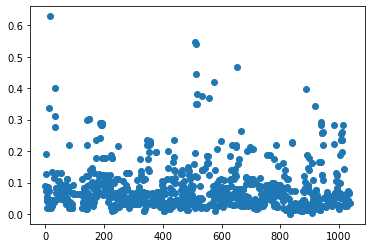

In [30]:
Y=pd.DataFrame(Y_coef(X=norm_X))

print(Y.describe())
plt.scatter([i for i in range(len(Y))],Y)
plt.show


In [31]:
Yprocessore = MinMaxScaler().fit(Y)

<function matplotlib.pyplot.show(close=None, block=None)>

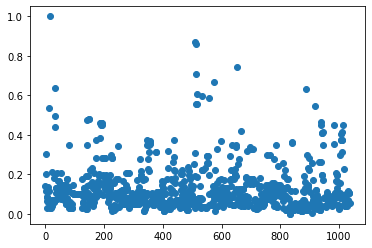

In [32]:
norm_Y=pd.DataFrame(Yprocessore.transform(Y))

plt.scatter([i for i in range(len(Y))],norm_Y)
plt.show

In [33]:
X_train, X_test, y_train, y_test = train_test_split(norm_X,norm_Y)

In [34]:
model=RandomForestRegressor()

In [35]:
model.fit(X_train,y_train)

C:\Users\zacha\AppData\Local\Temp\ipykernel_14680\2721349307.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor()

In [36]:
model.score(X_test,y_test)

0.9852347643885297

In [37]:
def learnCurb(X,Y,n):
    train_sizes=np.linspace(0.1,0.9,n)
   
    validation = []
    for i in range(n):
        model3 = RandomForestRegressor()
        X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=train_sizes[i])
        model3.fit(X_train, y_train)
        validation.append(model.score(X_test,y_test))
    plt.scatter(train_sizes,validation,c="red",label="score")
    plt.xlabel('train_sizes')
    plt.ylabel('score')
    plt.legend()
    plt.show()

C:\Users\zacha\AppData\Local\Temp\ipykernel_14680\4082818433.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)
C:\Users\zacha\AppData\Local\Temp\ipykernel_14680\4082818433.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)
C:\Users\zacha\AppData\Local\Temp\ipykernel_14680\4082818433.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)
C:\Users\zacha\AppData\Local\Temp\ipykernel_14680\4082818433.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_trai

C:\Users\zacha\AppData\Local\Temp\ipykernel_14680\4082818433.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)
C:\Users\zacha\AppData\Local\Temp\ipykernel_14680\4082818433.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)
C:\Users\zacha\AppData\Local\Temp\ipykernel_14680\4082818433.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)
C:\Users\zacha\AppData\Local\Temp\ipykernel_14680\4082818433.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_trai

C:\Users\zacha\AppData\Local\Temp\ipykernel_14680\4082818433.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)
C:\Users\zacha\AppData\Local\Temp\ipykernel_14680\4082818433.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)
C:\Users\zacha\AppData\Local\Temp\ipykernel_14680\4082818433.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)
C:\Users\zacha\AppData\Local\Temp\ipykernel_14680\4082818433.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_trai

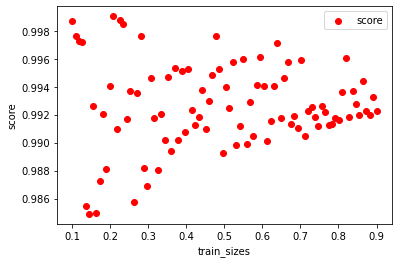

In [38]:
learnCurb(norm_X,norm_Y,90)

In [39]:
def err(Y,model,X):
    Y=np.array(Y)
    Y_pred=np.array(model.predict(X))
    Z=Y-Y_pred
    err_hist = np.abs(Z)
    plt.hist(err_hist,bins=100)
    plt.ylabel('nb prediction')
    plt.xlabel('taux d erreur')
    plt.show()

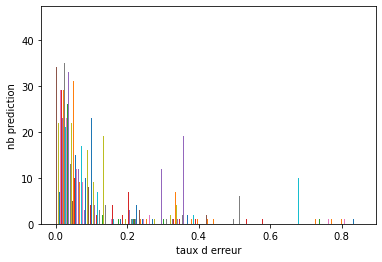

In [40]:
err(y_test,model,X_test)

In [41]:
def Modelscore(model,X_train, X_test, y_train, y_test,Y):
    print('train score:', model.score(X_train, y_train))
    print('test score:', model.score(X_test, y_test))
    Y_pred=model.predict(norm_X)
    print('mae : ', mean_absolute_error(Y,Y_pred))
    #la mse penalise beaucoup plus les grandes erreures que la mae
    print('mse : ', mean_squared_error(Y,Y_pred))
    #tres peu sensible aux grandes erreurs
    print('median abs err : ', median_absolute_error(Y, Y_pred))

In [42]:
Modelscore(model,X_train, X_test, y_train, y_test,norm_Y)

train score: 0.9960404909100526
test score: 0.9852347643885297
mae :  0.002106631067038107
mse :  9.397175436462612e-05
median abs err :  0.000398623877133894


Application de ce model a notre DB

DB Phantom Chief

In [43]:
df_phantom_chief=pd.read_excel("BD Phantom Chief.xlsx",index_col='Id')
df_phantom_chief

,Nom,Ingredient,QtIngredient,Etape,TempEtape,materiel,Difficulter,nbpersonne,type,Url
Id,,,,,,,,,,
0,Lasagne,"beurre,farine,lait,Pâtes à lasagne,oignon,ail,...","125g,100g,1L,1u,3u,2u,1u,1u,800g,0.15L,0.2L,2u...",Etape 1 : Faire revenir gousses hachées d'ail ...,"5min,5min,2min,45min,4min,4min,4min,4min,4min,...","saladiers,Plat à gratin, couteau,casserole,fou...",Moyen,8,Plat,https://assets.afcdn.com/recipe/20200408/10952...
1,Salade composée,"tomate,laitue,oeuf,emmental,olive,jambon blanc...","200g,1u,4u,50g,50g,200g,1u",Etape 1 : Laver la laitue. Mettre les feuilles...,"10min,3min,2min,1min","saladier,bol,dénoyauteur",Facile,4,"Entrée,plat",https://assets.afcdn.com/recipe/20200907/11393...
2,Tiramisu,"sucre,biscuit cuillère,cacao,oeuf,mascarpone,c...","100g,24u,30g,3u,250g,0.5L",Etape 1 : Séparer les blancs des jaunes d'oeuf...,"2min, 3min, 5min, 5min, 10min, 10min, 2min, 24...","réfrigérateur,cuillère en bois,fouet,spatule,s...",Facile,4,Dessert,https://www.galbani.fr/wp-content/uploads/2018...
3,Crêpe,"farine,lait,huile,biere,oeuf","500g,1L,3u,0.5L,5u",Etape 1 : Dans un saladier verser la moitié de...,"10min,1min,60min,30min","louche,saladier,poêle à crêpes,cuillère en bois",Facile,5,"Entrée,plat,dessert",https://www.hervecuisine.com/wp-content/upload...
4,Omelette aux pommes de terre et lardons,"pomme de terre,lardons,poivre,sel,huile,oeuf","2u,100g,épice,épice,1u,5u",Etape 1 : Eplucher 2 pommes de terre et les co...,"10min,1min,10min,1min,3min","poêle,couteau,econome,fouet",Facile,2,Entrée,https://assets.afcdn.com/recipe/20200220/10793...
5,Panacotta aux fruits rouges,"sucre,gélatines,mascarpone,crème liquide entiè...","100g,2u,250g,250g,1u",Etape 1 : Faire ramollir les feuilles de gélat...,"5min, 10min, 2min, 3min, 5min, 8min, 5min","cuillère en bois,saladier,mixeur,réfrigérateur...",Moyen,4,Dessert,https://wordpress.potagercity.fr/wp-content/up...
6,Burger,"tomate,oignon,emmental,ketchup,viande hachée,c...","100g,1u,10g,1u,1u,1u,1u,1u,1u",Etape 1 : Tranchez de fines lamelles d'emmenta...,"1min,5min,2min,3min,10min,5min,1min,1min","four,casserole,couvercle,saladier",Facile,1,Plat,https://www.umamiburgerparis.com/media/images/...
7,Gratin de pommes de terre aux lardons,"lard fumé,pomme de terre,oignon,ail,thym,huile...","200g,7u,2u,2u,épice,2u,épice,épice,4u",Etape 1 : Enfermez les gousses d'ail écrasées ...,"10min,10min,10min,15min,15min,20min,25min,5min","Plat à gratin,casserole,four,poêle",Moyen,6,Plat,https://res.cloudinary.com/hv9ssmzrz/image/fet...
8,Pâtes à la carbonara,"pates,crème fraîche,sel,poivre,lardons,oignon,...","500g,0.5L,épice,épice,250g,1u,3u",Etape 1 : Cuire les pâtes dans un grand volume...,"15min,5min,5min,1min,3min,1min","passoires,poêles,couteau,saladier",Facile,4,Plat,https://www.finedininglovers.fr/sites/g/files/...


In [44]:
mydata=['Nom','Ingredient']

In [45]:
df_use=df_phantom_chief[mydata]
df_use


,Nom,Ingredient
Id,,
0,Lasagne,"beurre,farine,lait,Pâtes à lasagne,oignon,ail,..."
1,Salade composée,"tomate,laitue,oeuf,emmental,olive,jambon blanc..."
2,Tiramisu,"sucre,biscuit cuillère,cacao,oeuf,mascarpone,c..."
3,Crêpe,"farine,lait,huile,biere,oeuf"
4,Omelette aux pommes de terre et lardons,"pomme de terre,lardons,poivre,sel,huile,oeuf"
5,Panacotta aux fruits rouges,"sucre,gélatines,mascarpone,crème liquide entiè..."
6,Burger,"tomate,oignon,emmental,ketchup,viande hachée,c..."
7,Gratin de pommes de terre aux lardons,"lard fumé,pomme de terre,oignon,ail,thym,huile..."
8,Pâtes à la carbonara,"pates,crème fraîche,sel,poivre,lardons,oignon,..."


In [46]:
df_Aliment=pd.read_excel("Aliment_v4.xlsx")
df_Aliment.shape[1]

17

In [47]:
import jaro
def get_Ressemblance_Unité(ingredient,Aliment=df_Aliment):
    ind_max=0
    ingredient1=str(ingredient)
    score_max=0
    for i in range(len(Aliment['Ingredient'])):
        ingredient3=str(Aliment.iloc[i,1])
        score=jaro.jaro_metric(ingredient1,ingredient3)
        if score >=score_max :
            ind_max=i
            score_max=score
    return Aliment.iloc[ind_max,:]

def get_Ressemblance_Liste(L_ingredient,Aliment=df_Aliment):
    retour=np.zeros((df_Aliment.shape[1],))
    for i in L_ingredient:
        a=np.array(get_Ressemblance_Unité(i, Aliment))
        retour=np.vstack((retour,a))
    retour = np.delete(retour,(0), axis = 0)
    df_retour=pd.DataFrame(retour,columns=(Aliment.columns))
    return (retour,df_retour)
    

In [48]:

def lig_som(Aliment=df_Aliment,df_use=df_use,indice=0):
    retour=np.zeros((1,len(Aliment)))
    str_ingredient=df_use['Ingredient'][indice]
    L_ingredient=str_ingredient.split(',')
    L_ingredient,df_ingredient=get_Ressemblance_Liste(L_ingredient,Aliment)
    som=pd.DataFrame(df_ingredient.sum())
    som=som.iloc[2:,:]
    a=np.array(som)
    return a.T
    

In [49]:
def full_data(Aliment=df_Aliment,df_use=df_use):
    retour=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
    for i in range(len(df_use['Ingredient'])):
        a=lig_som(indice=i)
        retour=np.vstack((retour,a))
    retour = np.delete(retour,(0), axis = 0)
    return retour
        
        


In [50]:
stat_recette=full_data()

In [51]:
df_Aliment.columns
col=['Score unique EF ',
       'Changement climatique ',
       'Appauvrissement de la couche d\'ozone ',
       'Rayonnements ionisants ',
       'Formation photochimique d\'ozone ',
       'Particules ',
       'Acidification terrestre et eaux douces ',
       'Eutrophisation terreste ',
       'Eutrophisation eaux douces ',
       'Eutrophisation marine ',
       'Utilisation du sol ',
       'Écotoxicité pour écosystèmes aquatiques d\'eau douce ',
       'Épuisement des ressources eau ',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux' ]

In [52]:
stat_recette=pd.DataFrame(stat_recette,columns=col)
stat_recette.head()

,Score unique EF,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules,Acidification terrestre et eaux douces,Eutrophisation terreste,Eutrophisation eaux douces,Eutrophisation marine,Utilisation du sol,Écotoxicité pour écosystèmes aquatiques d'eau douce,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,4.548126,50.099759,1.337623,2.55175,76.725477,3.924531,0.581093,2.528986,4.168972,204.631715,2985.814462,543.972151,20.350214,150.081537,34.462033
1,0.732326,3.664325,0.413903,96.446758,15.343425,0.438323,0.069753,0.298072,0.952047,28.268905,272.068816,320.597453,7.401372,55.861562,11.34739
2,2.058835,22.282677,1.077672,1.225115,45.043244,1.062349,0.137755,0.567666,2.751677,93.475989,471.619585,904.875333,15.730911,87.117439,26.379184
3,0.100586,0.468523,0.048016,0.05502,1.887544,0.07569,0.010379,0.047352,0.088061,4.297683,36.757119,17.485975,2.726278,4.159848,1.299257
4,0.198837,1.219194,0.108279,0.260462,4.039761,0.16488,0.023212,0.099602,0.300819,8.329755,83.178,44.999297,1.606224,12.564177,4.615357


In [53]:
df_Full_Data=df_phantom_chief.merge(stat_recette, how='inner', left_index=True, right_index=True)
df_Full_Data.columns

Index(['Nom', 'Ingredient', 'QtIngredient', 'Etape', 'TempEtape', 'materiel',
       'Difficulter', 'nbpersonne', 'type', 'Url', 'Score unique EF ',
       'Changement climatique ', 'Appauvrissement de la couche d'ozone ',
       'Rayonnements ionisants ', 'Formation photochimique d'ozone ',
       'Particules ', 'Acidification terrestre et eaux douces ',
       'Eutrophisation terreste ', 'Eutrophisation eaux douces ',
       'Eutrophisation marine ', 'Utilisation du sol ',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce ',
       'Épuisement des ressources eau ',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux'],
      dtype='object')

In [54]:
X=df_Full_Data[['Score unique EF ',
       'Changement climatique ', 'Appauvrissement de la couche d\'ozone ',
       'Rayonnements ionisants ', 'Formation photochimique d\'ozone ',
       'Particules ', 'Acidification terrestre et eaux douces ',
       'Eutrophisation terreste ', 'Eutrophisation eaux douces ',
       'Eutrophisation marine ', 'Utilisation du sol ',
       'Écotoxicité pour écosystèmes aquatiques d\'eau douce ',
       'Épuisement des ressources eau ',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux']]
X


,Score unique EF,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules,Acidification terrestre et eaux douces,Eutrophisation terreste,Eutrophisation eaux douces,Eutrophisation marine,Utilisation du sol,Écotoxicité pour écosystèmes aquatiques d'eau douce,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
Id,,,,,,,,,,,,,,,
0,4.548126,50.099759,1.337623,2.55175,76.725477,3.924531,0.581093,2.528986,4.168972,204.631715,2985.814462,543.972151,20.350214,150.081537,34.462033
1,0.732326,3.664325,0.413903,96.446758,15.343425,0.438323,0.069753,0.298072,0.952047,28.268905,272.068816,320.597453,7.401372,55.861562,11.34739
2,2.058835,22.282677,1.077672,1.225115,45.043244,1.062349,0.137755,0.567666,2.751677,93.475989,471.619585,904.875333,15.730911,87.117439,26.379184
3,0.100586,0.468523,0.048016,0.05502,1.887544,0.07569,0.010379,0.047352,0.088061,4.297683,36.757119,17.485975,2.726278,4.159848,1.299257
4,0.198837,1.219194,0.108279,0.260462,4.039761,0.16488,0.023212,0.099602,0.300819,8.329755,83.178,44.999297,1.606224,12.564177,4.615357
5,0.206026,1.53292,0.180431,0.681916,3.862459,0.133849,0.016008,0.062734,0.364996,7.522126,80.451665,50.675899,2.142801,23.950687,3.952933
6,2.821533,31.631308,1.048771,3.778328,45.037761,2.483756,0.369138,1.611994,1.937293,86.490969,1735.957527,288.461518,13.007912,139.017349,21.05294
7,0.249535,1.324071,0.136934,0.297642,4.802578,0.149703,0.020862,0.087315,0.407461,13.783404,128.427459,56.527059,5.612791,15.12155,5.810826
8,0.362292,2.063583,0.180119,0.427526,6.557499,0.290037,0.04187,0.173523,0.713136,16.993471,186.612969,68.353898,4.669516,21.998514,8.566443


In [55]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())

In [56]:
norm_X=pd.DataFrame(numerical_pipeline.fit_transform(X),columns=X.columns)
norm_X

,Score unique EF,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules,Acidification terrestre et eaux douces,Eutrophisation terreste,Eutrophisation eaux douces,Eutrophisation marine,Utilisation du sol,Écotoxicité pour écosystèmes aquatiques d'eau douce,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,1.000000,1.000000,1.000000,0.025615,1.000000,1.000000,1.000000,1.000000,0.666215,1.000000,1.000000,0.418488,0.588526,1.000000,1.000000
1,0.142042,0.064391,0.283720,0.988922,0.179800,0.094219,0.104034,0.101030,0.141047,0.119656,0.079792,0.240934,0.190152,0.354311,0.302994
2,0.440299,0.439525,0.798426,0.012004,0.576655,0.256352,0.223187,0.209666,0.434839,0.445148,0.147458,0.705360,0.446412,0.568508,0.756267
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046321,0.000000,0.000000
4,0.022091,0.015125,0.046730,0.002108,0.028758,0.023173,0.022486,0.021055,0.034733,0.020127,0.015741,0.021870,0.011862,0.057595,0.099995
5,0.023707,0.021446,0.102679,0.006432,0.026389,0.015111,0.009863,0.006198,0.045210,0.016095,0.014816,0.026382,0.028370,0.135626,0.080020
6,0.611787,0.627887,0.776016,0.038199,0.576582,0.625660,0.628613,0.630489,0.301890,0.410281,0.576184,0.215390,0.362638,0.924177,0.595658
7,0.033490,0.017238,0.068950,0.002489,0.038951,0.019230,0.018368,0.016103,0.052143,0.047350,0.031085,0.031033,0.135125,0.075120,0.136043
8,0.058843,0.032138,0.102437,0.003822,0.062401,0.055691,0.055178,0.050842,0.102045,0.063373,0.050815,0.040433,0.106105,0.122248,0.219137
9,0.546612,0.588546,0.460762,0.008965,0.522604,0.576615,0.574547,0.578649,0.300416,0.382571,0.536011,0.207103,0.406639,0.390264,0.600530


In [57]:
norm_Y=model.predict(X)
norm_Y

C:\JEUX\Python\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Acidification terrestre et eaux douces 
- Appauvrissement de la couche d'ozone 
- Changement climatique 
- Eutrophisation eaux douces 
- Eutrophisation marine 
- ...
Feature names seen at fit time, yet now missing:
- Acidification
- Climatique
- EcoScore
- Particules
- eau 
- ...

  warnings.warn(message, FutureWarning)


array([0.82631087, 0.67755751, 0.78342068, 0.13262929, 0.2085602 ,
       0.25268876, 0.79671738, 0.31888824, 0.36366151, 0.79671738,
       0.79671738, 0.61659558, 0.60537322, 0.15177395, 0.28646367,
       0.73356202, 0.34910312, 0.65845811, 0.68009971, 0.69424884,
       0.79670849, 0.79500049, 0.60017068, 0.7565843 , 0.75616892,
       0.66021523, 0.33825713, 0.36446897])

In [58]:
df_Full_Data['Prediction eco']=norm_Y
df_Full_Data

,Nom,Ingredient,QtIngredient,Etape,TempEtape,materiel,Difficulter,nbpersonne,type,Url,...,Acidification terrestre et eaux douces,Eutrophisation terreste,Eutrophisation eaux douces,Eutrophisation marine,Utilisation du sol,Écotoxicité pour écosystèmes aquatiques d'eau douce,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Prediction eco
Id,,,,,,,,,,,,,,,,,,,,,
0,Lasagne,"beurre,farine,lait,Pâtes à lasagne,oignon,ail,...","125g,100g,1L,1u,3u,2u,1u,1u,800g,0.15L,0.2L,2u...",Etape 1 : Faire revenir gousses hachées d'ail ...,"5min,5min,2min,45min,4min,4min,4min,4min,4min,...","saladiers,Plat à gratin, couteau,casserole,fou...",Moyen,8,Plat,https://assets.afcdn.com/recipe/20200408/10952...,...,0.581093,2.528986,4.168972,204.631715,2985.814462,543.972151,20.350214,150.081537,34.462033,0.826311
1,Salade composée,"tomate,laitue,oeuf,emmental,olive,jambon blanc...","200g,1u,4u,50g,50g,200g,1u",Etape 1 : Laver la laitue. Mettre les feuilles...,"10min,3min,2min,1min","saladier,bol,dénoyauteur",Facile,4,"Entrée,plat",https://assets.afcdn.com/recipe/20200907/11393...,...,0.069753,0.298072,0.952047,28.268905,272.068816,320.597453,7.401372,55.861562,11.34739,0.677558
2,Tiramisu,"sucre,biscuit cuillère,cacao,oeuf,mascarpone,c...","100g,24u,30g,3u,250g,0.5L",Etape 1 : Séparer les blancs des jaunes d'oeuf...,"2min, 3min, 5min, 5min, 10min, 10min, 2min, 24...","réfrigérateur,cuillère en bois,fouet,spatule,s...",Facile,4,Dessert,https://www.galbani.fr/wp-content/uploads/2018...,...,0.137755,0.567666,2.751677,93.475989,471.619585,904.875333,15.730911,87.117439,26.379184,0.783421
3,Crêpe,"farine,lait,huile,biere,oeuf","500g,1L,3u,0.5L,5u",Etape 1 : Dans un saladier verser la moitié de...,"10min,1min,60min,30min","louche,saladier,poêle à crêpes,cuillère en bois",Facile,5,"Entrée,plat,dessert",https://www.hervecuisine.com/wp-content/upload...,...,0.010379,0.047352,0.088061,4.297683,36.757119,17.485975,2.726278,4.159848,1.299257,0.132629
4,Omelette aux pommes de terre et lardons,"pomme de terre,lardons,poivre,sel,huile,oeuf","2u,100g,épice,épice,1u,5u",Etape 1 : Eplucher 2 pommes de terre et les co...,"10min,1min,10min,1min,3min","poêle,couteau,econome,fouet",Facile,2,Entrée,https://assets.afcdn.com/recipe/20200220/10793...,...,0.023212,0.099602,0.300819,8.329755,83.178,44.999297,1.606224,12.564177,4.615357,0.208560
5,Panacotta aux fruits rouges,"sucre,gélatines,mascarpone,crème liquide entiè...","100g,2u,250g,250g,1u",Etape 1 : Faire ramollir les feuilles de gélat...,"5min, 10min, 2min, 3min, 5min, 8min, 5min","cuillère en bois,saladier,mixeur,réfrigérateur...",Moyen,4,Dessert,https://wordpress.potagercity.fr/wp-content/up...,...,0.016008,0.062734,0.364996,7.522126,80.451665,50.675899,2.142801,23.950687,3.952933,0.252689
6,Burger,"tomate,oignon,emmental,ketchup,viande hachée,c...","100g,1u,10g,1u,1u,1u,1u,1u,1u",Etape 1 : Tranchez de fines lamelles d'emmenta...,"1min,5min,2min,3min,10min,5min,1min,1min","four,casserole,couvercle,saladier",Facile,1,Plat,https://www.umamiburgerparis.com/media/images/...,...,0.369138,1.611994,1.937293,86.490969,1735.957527,288.461518,13.007912,139.017349,21.05294,0.796717
7,Gratin de pommes de terre aux lardons,"lard fumé,pomme de terre,oignon,ail,thym,huile...","200g,7u,2u,2u,épice,2u,épice,épice,4u",Etape 1 : Enfermez les gousses d'ail écrasées ...,"10min,10min,10min,15min,15min,20min,25min,5min","Plat à gratin,casserole,four,poêle",Moyen,6,Plat,https://res.cloudinary.com/hv9ssmzrz/image/fet...,...,0.020862,0.087315,0.407461,13.783404,128.427459,56.527059,5.612791,15.12155,5.810826,0.318888
8,Pâtes à la carbonara,"pates,crème fraîche,sel,poivre,lardons,oignon,...","500g,0.5L,épice,épice,250g,1u,3u",Etape 1 : Cuire les pâtes dans un grand volume...,"15min,5min,5min,1min,3min,1min","passoires,poêles,couteau,saladier",Facile,4,Plat,https://www.finedininglovers.fr/sites/g/files/...,...,0.04187,0.173523,0.713136,16.993471,186.612969,68.353898,4.669516,21.998514,8.566443,

In [60]:
df_Full_Data.to_excel("BD Phantom Chief final.xlsx")